Point1:  (276.2327575683594, 236.78233337402344)
Point2:  (79.13481140136719, 61.503658294677734)
---------------------------
Point1:  (229.62452697753906, 192.27593994140625)
Point2:  (117.93952941894531, 20.782506942749023)
---------------------------
Point1:  (321.1212158203125, 212.66600036621094)
Point2:  (100.06669616699219, 100.8641357421875)
---------------------------
Point1:  (295.0352478027344, 260.9696350097656)
Point2:  (57.89035415649414, 78.07573699951172)
---------------------------
Point1:  (255.45867919921875, 300.2322692871094)
Point2:  (24.07987403869629, 43.314327239990234)
---------------------------


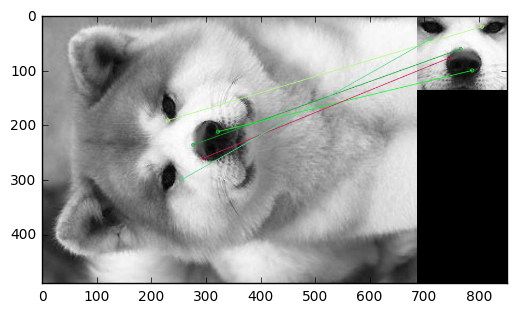

(<matplotlib.image.AxesImage at 0x7f1e6a47de10>, None)

In [4]:
import cv2
from matplotlib import pyplot as plt

img1 = cv2.imread('Akita-inu.png', 0)  # queryImage
img2 = cv2.imread('akita-mini.PNG', 0)  # trainImage


# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

# Apply ratio test
good = []
for m, n in matches:
    if m.distance < 0.1 * n.distance:
        good.append([m])

for dmatch in good:
    point1 = kp1[dmatch[0].queryIdx].pt
    point2 = kp2[dmatch[0].trainIdx].pt
    print('Point1: ',point1)
    print('Point2: ',point2)
    print('---------------------------')

img3 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, good, 4, flags=2)
plt.imshow(img3), plt.show()

